In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai import *
from fastai.vision import *
from fastai.callbacks import *

In [19]:
np.random.seed(42)

In [3]:
PATH = Path('/content/data/')

In [4]:
train_df = pd.read_csv(PATH/'train.csv')

In [5]:
train_df.head()

,image_id,category
0,0,77
1,1,81
2,2,52
3,3,72
4,4,58


In [6]:
img = plt.imread(PATH/'train'/'0.jpg')

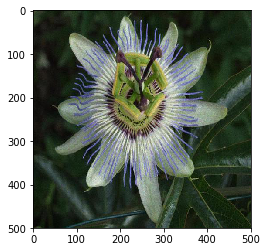

In [7]:
plt.imshow(img)

In [6]:
def getdata(sz,bs,suffix='.jpg'):
    data = ImageDataBunch.from_df(PATH,train_df,'train',suffix=suffix,
                              size = sz, bs=bs,ds_tfms=get_transforms(flip_vert=True,max_lighting=0.75),num_workers=8).normalize()
    return data

In [8]:
sz = 128
bs = 64

In [9]:
data = getdata(sz,bs)

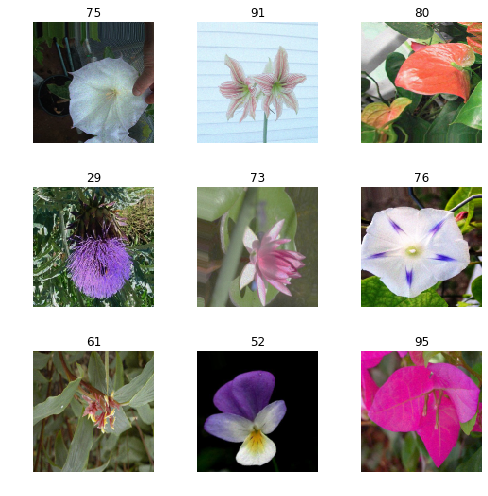

In [11]:
data.show_batch(rows=3,figsize=(7,7))

In [12]:
learn = cnn_learner(data,models.resnet18,pretrained=True,metrics=[accuracy],callback_fns=[CSVLogger])

In [13]:
callbacks = [SaveModelCallback(learn,every='epoch',monitor='accuracy',name='model')]

In [14]:
learn.callbacks = callbacks

In [15]:
learn.model_dir = '/content/gdrive/My Drive/GardeNerd/models'

In [24]:
learn.fit_one_cycle(3)

epoch,train_loss,valid_loss,accuracy,time
0,2.091107,0.955026,0.737325,03:30
1,1.187770,0.536597,0.845739,03:31
2,0.952605,0.459420,0.868393,03:32


In [25]:
learn.save('stage-1')

In [30]:
learn.unfreeze()
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,accuracy,time
0,0.680192,0.280535,0.923948,03:39


In [31]:
learn.save('stage-2')

In [14]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


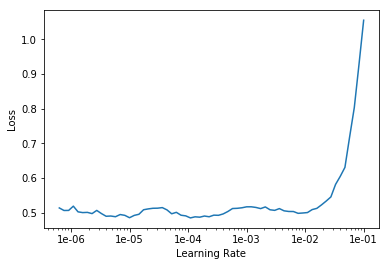

In [17]:
learn.recorder.plot()

In [30]:
learn.unfreeze()
learn.fit_one_cycle(10,max_lr=slice(1e-6,1e-5))

epoch,train_loss,valid_loss,accuracy,time
0,0.543981,0.232499,0.935005,03:10
1,0.516965,0.225329,0.937702,03:08
2,0.491107,0.208341,0.941478,03:05
3,0.492329,0.201717,0.945793,03:05
4,0.447818,0.190452,0.949029,03:04
5,0.454774,0.187922,0.946063,03:02
6,0.460376,0.182175,0.950378,03:02
7,0.418602,0.178723,0.951187,03:01
8,0.413294,0.177876,0.950647,03:01
9,0.405792,0.177870,0.951726,03:00


In [31]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


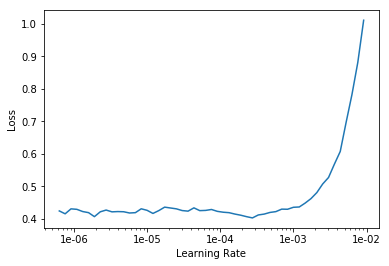

In [32]:
learn.recorder.plot()

In [34]:
learn.fit_one_cycle(20,max_lr=slice(1e-4))

epoch,train_loss,valid_loss,accuracy,time
0,0.410853,0.177373,0.949299,03:01
1,0.398181,0.171592,0.952265,03:01
2,0.389392,0.165107,0.953344,03:01
3,0.383791,0.153261,0.956580,03:00
4,0.349305,0.139952,0.963053,03:00
5,0.333168,0.128800,0.965750,03:00
6,0.288657,0.118114,0.969525,03:00
7,0.295076,0.106259,0.972222,03:00
8,0.264480,0.099993,0.973031,03:05
9,0.241338,0.092737,0.975728,03:02


In [35]:
learn.save('stage-3')

In [46]:
learn.fit_one_cycle(30,max_lr=slice(1e-4))

In [47]:
learn.csv_logger.read_logged_file()

,epoch,train_loss,valid_loss,accuracy,time
0,0,0.194733,0.071711,0.981931,03:02
1,1,0.185671,0.072729,0.981122,03:03
2,2,0.197689,0.070126,0.983279,03:02
3,3,0.192045,0.070223,0.982740,03:01
4,4,0.198183,0.070108,0.983549,03:02
5,5,0.183496,0.067888,0.982201,03:01
6,6,0.180437,0.063781,0.984628,03:01
7,7,0.175111,0.060694,0.986785,03:01
8,8,0.161091,0.060197,0.983819,03:03
9,9,0.156128,0.055403,0.985976,03:00


In [48]:
learn.save('stage-4')

In [55]:
learn.fit_one_cycle(10,max_lr=slice(1e-4))

In [56]:
learn.csv_logger.read_logged_file()

,epoch,train_loss,valid_loss,accuracy,time
0,0,0.101340,0.039188,0.989752,03:06
1,1,0.105159,0.037613,0.989482,03:05
2,2,0.099310,0.036442,0.991100,03:05
3,3,0.094843,0.037616,0.990022,03:04
4,4,0.086654,0.036089,0.991100,03:03
5,5,0.102249,0.037729,0.990561,03:11
6,6,0.085179,0.034965,0.991370,03:11
7,7,0.087360,0.035793,0.991640,03:12
8,8,0.090403,0.035614,0.990831,03:13
9,9,0.079515,0.034427,0.991640,03:11


In [57]:
learn.save('stage-5')

In [26]:
learn.load('stage-5');

# Progressive Training

In [23]:
sz = 224

In [27]:
learn.data = getdata(sz,bs)

In [28]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,accuracy,time
0,0.346414,0.240839,0.927184,05:09
1,0.345216,0.156486,0.953883,05:09
2,0.160508,0.056746,0.983279,05:09
3,0.084534,0.025025,0.994876,05:11


In [30]:
learn.save('stage-6')

In [ ]:
learn.fit_one_cycle(40)

In [33]:
learn.csv_logger.read_logged_file()

,epoch,train_loss,valid_loss,accuracy,time
0,0,0.062819,0.021072,0.995146,05:13
1,1,0.061295,0.018163,0.995685,05:46
2,2,0.054605,0.017494,0.996224,06:30
3,3,0.082494,0.016532,0.994876,05:13
4,4,0.079801,0.025453,0.990561,05:19


In [35]:
learn.load('model_2');

In [36]:
learn.save('stage-7')

In [38]:
learn.load('stage-7');

In [44]:
learn.unfreeze()

In [40]:
learn.data = getdata(500,bs)

In [48]:
learn.fit_one_cycle(10,max_lr=slice(9e-7,9e-6))

epoch,train_loss,valid_loss,accuracy,time
0,0.182929,0.070651,0.980043,07:46
1,0.170087,0.061879,0.981931,07:47
2,0.146107,0.053457,0.986785,07:44
3,0.144502,0.050138,0.986516,07:42
4,0.134798,0.048582,0.985707,07:43
5,0.127594,0.043549,0.988943,07:42
6,0.111630,0.042841,0.988943,07:45
7,0.110349,0.042654,0.988403,07:51
8,0.117220,0.044896,0.987864,07:50
9,0.113565,0.040652,0.990022,07:46


In [42]:
#learn.load('model_6');

In [49]:
learn.save('renet18_stage-9')

In [50]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


Min numerical gradient: 6.31E-07
Min loss divided by 10: 2.51E-06


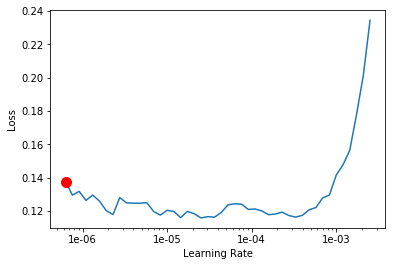

In [51]:
learn.recorder.plot(suggestion=True)

In [52]:
learn.fit_one_cycle(10,max_lr=slice(6e-7,2e-6))

epoch,train_loss,valid_loss,accuracy,time
0,0.110932,0.040037,0.990022,07:49
1,0.122476,0.042650,0.988943,07:53
2,0.112759,0.042027,0.988403,07:48
3,0.116157,0.037620,0.989752,07:50
4,0.107015,0.038408,0.990022,07:48
5,0.104022,0.037614,0.990291,07:51
6,0.109670,0.038262,0.990291,07:51
7,0.102092,0.037069,0.989482,07:48
8,0.101364,0.038226,0.989752,07:48
9,0.097825,0.038278,0.990561,07:48


In [54]:
learn.save('renet18_stage-10')

In [58]:
learn.load('renet18_stage-10');

# Reduce the size of images to 400x400

By Using full sized images the model isn't converging.

In [59]:
learn.data = getdata(400,bs)

In [60]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


Min numerical gradient: 9.12E-07
Min loss divided by 10: 6.92E-05


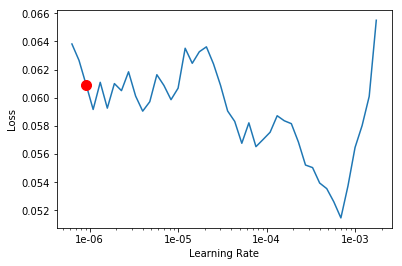

In [62]:
learn.recorder.plot(suggestion=True)

In [ ]:
learn.fit_one_cycle(30,max_lr=slice(5e-4))

epoch,train_loss,valid_loss,accuracy,time
0,0.072699,0.007374,0.998652,06:21
1,0.055450,0.006352,0.999191,06:20
2,0.062576,0.005494,0.998652,06:21
3,0.054782,0.004890,0.998921,06:20
4,0.052352,0.003953,0.999730,06:20
5,0.049230,0.004576,0.999191,06:21
6,0.053166,0.003911,0.998382,06:20
7,0.058104,0.003323,1.000000,06:15
8,0.051025,0.003153,0.999461,06:13
9,0.039541,0.004841,0.998652,06:12


Stopped the training as the loss is not improving anymore.

In [ ]:
learn.csv_logger.read_logged_file()

In [ ]:
learn.load('model_4');

In [ ]:
learn.save('resnet18_best_model_so_far')

# Submission

In [56]:
sample_df = pd.read_csv(PATH/'sample_submission.csv')
learn.data.add_test(ImageList.from_df(sample_df,PATH,folder='test',suffix='.jpg'))

#preds,y = learn.get_preds(ds_type=DatasetType.Test)
preds,y = learn.TTA(ds_type=DatasetType.Test)
sample_df.category = preds.argmax(1) + 1
sample_df.to_csv('submission.csv',index=False)